<h2>Описание проекта <a class="tocSkip"> </h2>

**Заказчик** — интернет - магазин
    
**Цель проекта** - выполнить A/B-тестирование для проверки подготовленных гипотез для увеличения выручки
    
**Описание данных для первой части проекта:**
    
Файл /datasets/hypothesis.csv
    
- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Описание данных для второй части проекта:**
    
Файл /datasets/orders.csv
    
- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.
    
Файл /datasets/visitors.csv
    
- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

### Откроем файлы с данными и изучим информацию

In [3]:
#Импортируем библиотеки
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import warnings
import datetime as dt
#Код для предотвращения всплывающих ошибок
warnings.filterwarnings("ignore")

#### Файл с гипотезами

In [4]:
#Сохраним датасет в переменную hypothesis
hypothesis = pd.read_csv('hypothesis.csv')

In [5]:
pd.options.display.max_colwidth = 110
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Наш датасет содержит 9 гипотез с проставленными параметрами Reach, Impact, Confidence, Effort

In [6]:
#Сразу же приведем наименования колонок к правильному регистру
hypothesis.columns = ['hypothesis', 'reach', 'impact', 'confidence', 'efforts']

#### Файл с заказами

In [7]:
#Сохраним датасет в переменную orders
orders = pd.read_csv('orders.csv')

In [8]:
#Выведем первые 5 строк для ознакомления с датасетом
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [9]:
#Проверим наличие пропусков и типы колонок
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [10]:
#Необходимо изменить тип данных на date
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [11]:
#Проверим датасет на наличие дубликатов
orders.duplicated().sum()

0

#### Файл с посещениями сайта

In [12]:
#Сохраним датасет в переменную orders
visitors = pd.read_csv('visitors.csv')

In [13]:
#Выведем первые 5 строк для ознакомления с датасетом
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [14]:
#Проверим наличие пропусков и типы колонок
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [15]:
#Необходимо изменить тип данных на date
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [16]:
#Проверим датасет на наличие дубликатов
visitors.duplicated().sum()

0

In [17]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [18]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


### Приоритезация гипотез

#### Фреймворк ICE

In [19]:
#Добавим в наш датасет с гипотезами столбец с расчитаной оценкой ICE 
hypothesis['ICE'] = round(hypothesis['impact'] *  hypothesis['confidence'] /  hypothesis['efforts'], 2)

In [20]:
#Выведем гипотезы и оценки ICE для них в порядке убывания
hypothesis[['hypothesis','ICE']].sort_values('ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Наиболее перспективными гипотезами являются гипотезы под номерами:
- 8 - Запустить акцию, дающую скидку на товар в день рождения	
- 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- 6 - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию


#### Фреймворк RICE

In [21]:
#Добавим в наш датасет с гипотезами столбец с расчитаной оценкой RICE 
hypothesis['RICE'] =  hypothesis['reach'] * hypothesis['impact'] *  hypothesis['confidence'] /  hypothesis['efforts']

In [22]:
#Выведем гипотезы и оценки RICE для них в порядке убывания
hypothesis[['hypothesis','RICE']].sort_values('RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Выводы:**

При оценке гипотез фреймворком RICE наиболее перспективными гипотезами стали: `7, 2, 0, 6`. Если сравнивать полученные результаты с результатами, которые были получениы при оценке за счет фреймворка ICE, то список успешных гипотез изменился только на одну - это вторая гипотеза. Смещение гипотезы №8 произошло из - за слишком малого охвата пользователей (всего лишь 1 из 10), в то время, как у гипотезы №2 охват был оценен, как 8 из 10. Также самой успешной гипотезой стала седьмая за счет максимальной оценки показателя 'Reach'.
Получившийся список наиболее успешных гипотез (гипотеза - оценка) с учетом того, что нам важен охват пользователей:
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок - 112
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа - 56
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей -  40
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию - 40

### Анализ A/B-теста

#### Датасет с кумулятивными данными

Для начала проверим есть ли пользователи, которые попадают в обе группы разом. Ведь если показы накладываются друг на друга, это может исказить результаты.

In [23]:
#Напишем цикл, который обнаружит пользователей, которые попали в обе группы A/B - тестирования
povtor_us = orders.pivot_table(index=['visitorId', 'group'])
userAB = []
for _ in range(len(povtor_us)):
    if povtor_us.index[_][0] == povtor_us.index[_ - 1][0]:
        if povtor_us.index[_][1]!=povtor_us.index[_ - 1][1]:
            userAB.append(povtor_us.index[_][0])

In [24]:
#Посчитаем уникальных пользователей, которые сделали заказ
orders['visitorId'].nunique()

1031

In [25]:
#Посчитаем этих пользователей
pd.Series(userAB).count()

58

Получилось 58 пользователей

In [26]:
round(pd.Series(userAB).count() / orders['visitorId'].nunique() * 100, 2)

5.63

Процент пользователей, которые попали в две группы A/B - теста одновременно составил 5.63% - это довольно много, такой процент говорит нам о том, что результаты нашего анализа могут быть искажены (но вряд ли значительно). Информацию об этом необходимо будет передать специалистам, проводившим A/B - тестирование.

In [27]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

In [28]:
#Агрегированные кумулятивные по дням данные о заказах в интернет-магазине: 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [29]:
#Агрегированные кумулятивные по дням данные о посетителях интернет-магазина: 
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg(
        {'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [30]:
#Объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head() 

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


#### График кумулятивной выручки по группам

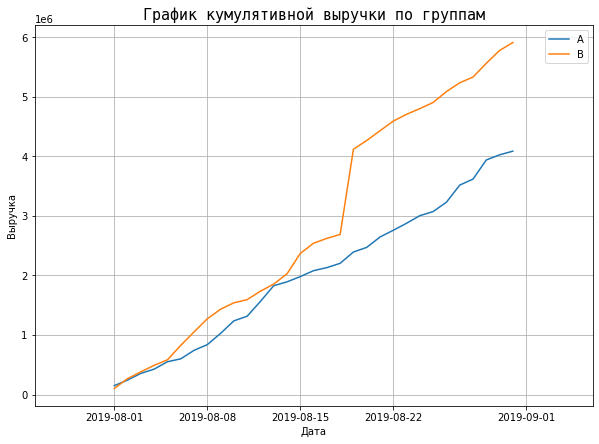

In [31]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

fig, ax = plt.subplots()
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

#Добавляем сетку
ax.grid()

#Подписываем оси
ax.set_xlabel('Дата')
ax.set_ylabel('Выручка')

#Устанавливаем размеры графика
fig.set_figwidth(10)
fig.set_figheight(7)
#Устанавливаем масштаб оси x
ax.margins(x=0.2)

#Добавляем заголовок графику
ax.set_title('График кумулятивной выручки по группам',
                fontfamily = 'monospace',
                fontstyle = 'normal',
                fontsize = 15)
#Выводим легенду
plt.legend() 

Выручка почти равномерно увеличивается в течение всего теста за исключением одного периода, на графике видно, как произошел резкий всплеск выручки у группы B. Это может сигнализировать о всплесках числа заказов в группе B, либо о появлении очень дорогих заказов.

#### График кумулятивного среднего чека по группам

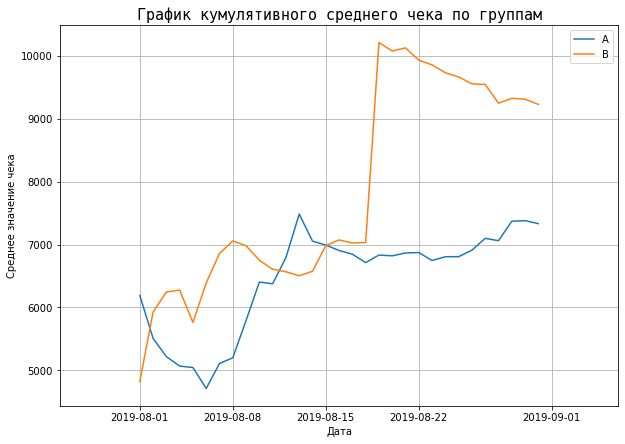

In [32]:
fig, ax = plt.subplots()
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

#Добавляем сетку
ax.grid()

#Подписываем оси
ax.set_xlabel('Дата')
ax.set_ylabel('Среднее значение чека')

#Устанавливаем размеры графика
fig.set_figwidth(10)
fig.set_figheight(7)
#Устанавливаем масштаб оси x
ax.margins(x=0.2)

#Добавляем заголовок графику
ax.set_title('График кумулятивного среднего чека по группам',
                fontfamily = 'monospace',
                fontstyle = 'normal',
                fontsize = 15)
#Выводим легенду
plt.legend() 

Средний чек тоже становится равномерным ближе к концу теста: установился для группы A, для группы B не все так однозначно.
В середине теста также заметен резкий всплеск роста среднего чека в группе B, после чего средняя начала падать, скорее всего ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне после такого резкого скачка.

#### График относительного изменения кумулятивного среднего чека группы B к группе A

Text(0.5, 1.0, 'График относительного изменения кумулятивного среднего чека группы B к группе A')

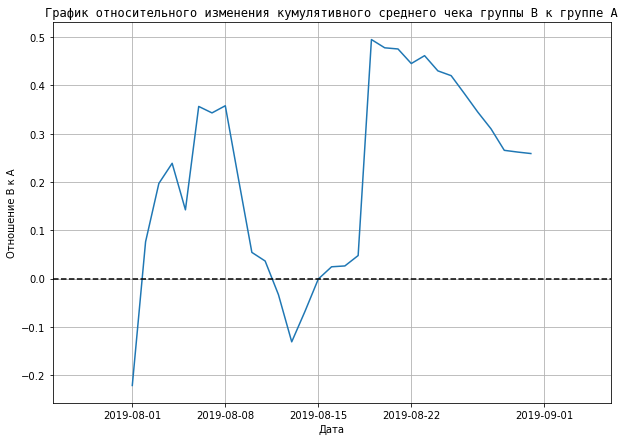

In [33]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

fig, ax = plt.subplots()

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)


# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')



#Добавляем сетку
ax.grid()

#Подписываем оси
ax.set_xlabel('Дата')
ax.set_ylabel('Отношение B к A')

#Устанавливаем размеры графика
fig.set_figwidth(10)
fig.set_figheight(7)
#Устанавливаем масштаб оси x
ax.margins(x=0.2)

#Добавляем заголовок графику
ax.set_title('График относительного изменения кумулятивного среднего чека группы B к группе A',
                fontfamily = 'monospace',
                fontstyle = 'normal',
                fontsize = 12)


В нескольких точках на графике мы можем наблюдать различие между сегментами (резкие скачки). Скорее всего это связанно с крупными заказами и выбросами.

#### График кумулятивного среднего количества заказов на посетителя по группам

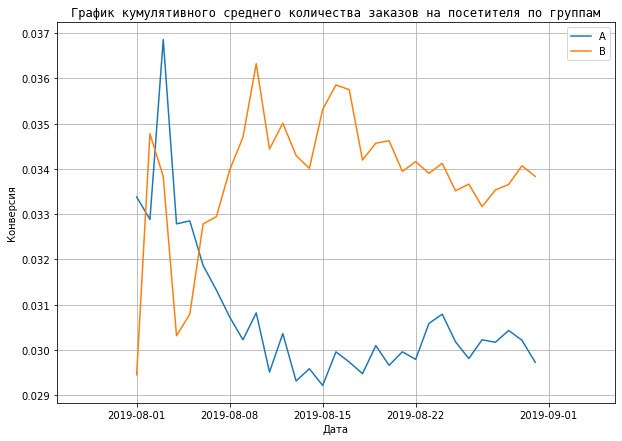

In [34]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
fig, ax = plt.subplots()

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()


#Добавляем сетку
ax.grid()

#Подписываем оси
ax.set_xlabel('Дата')
ax.set_ylabel('Конверсия')

#Устанавливаем размеры графика
fig.set_figwidth(10)
fig.set_figheight(7)
#Устанавливаем масштаб оси x
ax.margins(x=0.2)

#Добавляем заголовок графику
ax.set_title('График кумулятивного среднего количества заказов на посетителя по группам',
                fontfamily = 'monospace',
                fontstyle = 'normal',
                fontsize = 12)
#Выводим легенду
plt.legend() 

Группы колебались около одного значения, но затем конверсия группы B вырвалась вперёд, но начала падать, фиксации результатов не наблюдается, а конверсия группы A просела и зафиксировалась.

#### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

Text(0.5, 1.0, 'График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')

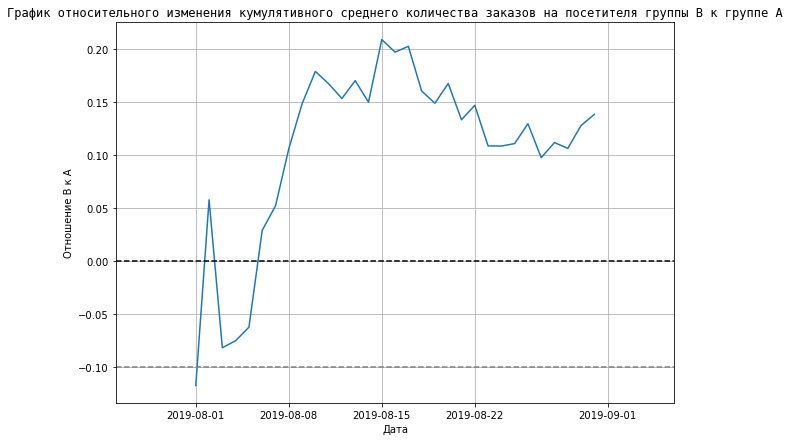

In [35]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

fig, ax = plt.subplots()

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')

#Добавляем сетку
ax.grid()

#Подписываем оси
ax.set_xlabel('Дата')
ax.set_ylabel('Отношение B к A')

#Устанавливаем размеры графика
fig.set_figwidth(10)
fig.set_figheight(7)
#Устанавливаем масштаб оси x
ax.margins(x=0.2)

#Добавляем заголовок графику
ax.set_title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A',
                fontfamily = 'monospace',
                fontstyle = 'normal',
                fontsize = 12)


В начале теста группа B незначительно проигрывала группе A, затем вырвалась вперёд. Но потом её конверсия начала постепенно падала, но под конец график пошел вверх.

*Промежуточные выводы:*
Отношение изменения кумулятивного среднего количества заказов на посетителя (конверсия) еще не до конца установилась, также об этом нам говорит резкий всплеск в группе B, который мог значительно исказить результы, и на данный момент, конверсия стремится к своему истинному среднему значению (так как равномерного роста или падения не наблюдается).

#### Датасет с количеством заказов по пользователям

In [36]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 

          userId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


#### Точечный график количества заказов по пользователям

Text(0.5, 1.0, 'Точечный график количества заказов по пользователям')

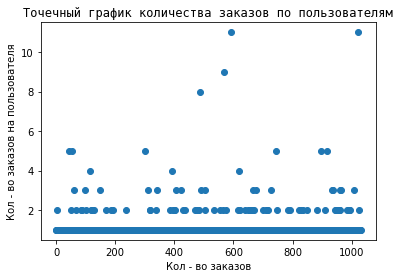

In [37]:
x_values = pd.Series(range(0,len(ordersByUsers)))

fig, ax = plt.subplots()
plt.scatter(x_values, ordersByUsers['orders'])

#Подписываем оси
ax.set_xlabel('Кол - во заказов')
ax.set_ylabel('Кол - во заказов на пользователя')
ax.set_title('Точечный график количества заказов по пользователям',
                fontfamily = 'monospace',
                fontstyle = 'normal',
                fontsize = 12)

На графике мы наблюдаем много пользователей с 2-3 заказами. На этом этапе их точная доля не ясна, для определения их доли и, соответсвенно, считать ли их аномалиями, посчитаем 95-й и 99-й персентили.

#### 95-й и 99-й перцентили количества заказов на пользователя

In [38]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[2. 4.]


Не более 5% пользователей оформляли больше чем 2  заказа. И 1% пользователей заказывали 4 и более раз. 
Было бы логично выбрать 2 заказа на одного пользователя за верхнюю границу числа заказов и отсеять аномальных пользователей по ней.

#### Точечный график стоимостей заказов

Text(0.5, 1.0, 'Точечный график стоимостей заказов')

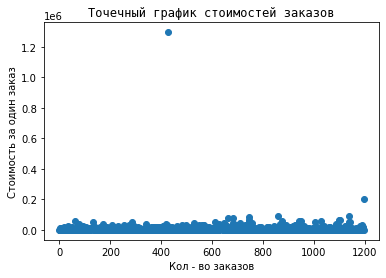

In [39]:
x_values = pd.Series(range(0,len(orders['revenue'])))

fig, ax = plt.subplots()
plt.scatter(x_values, orders['revenue']) 

ax.set_xlabel('Кол - во заказов')
ax.set_ylabel('Стоимость за один заказ')
ax.set_title('Точечный график стоимостей заказов',
                fontfamily = 'monospace',
                fontstyle = 'normal',
                fontsize = 12)

На графике видно, что были заказы по стоимости около 200 000 рублей и даже выше 1.2 млн. рублей, следует изменить масштаб, чтобы понимать реальную картину без таких аномально больших выбросов.

Text(0.5, 1.0, 'Точечный график стоимостей заказов')

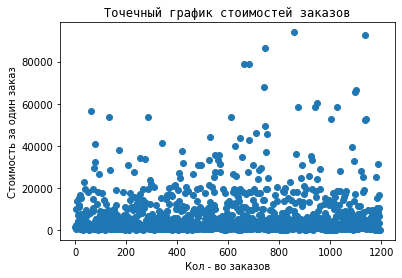

In [40]:
#Выведем все заказазы, сумма которых не превышала 100 000 рублей
x_values = pd.Series(range(0,len(orders[orders['revenue'] < 100000])))

fig, ax = plt.subplots()
plt.scatter(x_values, orders[orders['revenue'] < 100000]['revenue']) 


ax.set_xlabel('Кол - во заказов')
ax.set_ylabel('Стоимость за один заказ')
ax.set_title('Точечный график стоимостей заказов',
                fontfamily = 'monospace',
                fontstyle = 'normal',
                fontsize = 12)

Из данного графика становится понятно, что основная масса заказов стоит до 40 000 рублей. На этом этапе их точная доля выбросов не ясна, для определения их доли и, соответсвенно, считать ли их аномалиями, посчитаем 95-й и 99-й персентили.


#### 95-й и 99-й перцентили стоимости заказов

In [41]:
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


Не более 5% заказов стоят больше чем 28 000 рублей. И 1% заказов стоят больше, чем 58 233 рублей. Было бы логично отобрать заказы, стоимость которых не превышает 28 000 рублей (взять 28 000 за верхний порог и отсеять аномальных пользователей по ней).

#### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Для начала сформулируем гипотезы. 

Н0: различий в среднем количестве заказов на посетителя между группами нет.

Н1: различия в среднем между группами есть.

In [42]:
#Подготовим все необходимые данные
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

#Выведем первые 5 строк для ознакомления
data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


- date — дата;
- ordersPerDateA — количество заказов в выбранную дату в группе A;
- revenuePerDateA — суммарная выручка в выбранную дату в группе A;
- ordersPerDateB — количество заказов в выбранную дату в группе B;
- revenuePerDateB — суммарная выручка в выбранную дату в группе B;
- ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
- revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
- ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
- revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
- visitorsPerDateA — количество пользователей в выбранную дату в группе A;
- visitorsPerDateB — количество пользователей в выбранную дату в группе B;
- visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
- visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

In [43]:
#Переменные, в которых для пользователей, которые заказывали хотя бы 1 раз, указано число совершённых заказов. 
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

In [44]:
#Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов.
#Тем, кто ничего не заказал, будут соответствовать нули.

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
#Выведем p-value
print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительный прирост среднего числа заказов = {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value = 0.017
Относительный прирост среднего числа заказов = 0.138


p-value = 0.017

Относительный прирост среднего числа заказов = 0.138

p-value = 0.017, меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Также относительный выигрыш группы B равен 13.8%.

*Вывод*: По «сырым» данным есть различия между группами A и B, причем, положительная разница в размере 13.8% наблюдается в сторону группы B.

#### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Для начала сформулируем гипотезы.

H0: различий в среднем чеке между группами нет
    
H1: различия в среднем чеке между группами есть

In [45]:
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост значения среднего чека =  {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value = 0.729
Относительный прирост значения среднего чека =  0.259


p-value = 0.729

Относительный прирост значения среднего чека =  0.259

p-value = 0.729, больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Относительная разница между средним чеком группы B и группы А составляет 25.9%.

Вывод: По «сырым» данным различий в среднем чеке заказов групп A и B нет. Относительный выигрыш группы B равен 25.9% Вероятнее всего различие было получено случайным образом.

#### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Примем за аномальных пользователей тех, кто совершил от 3 заказов или совершил заказ дороже 28 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 28 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. 

In [46]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], [95, 99])[0]]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], [95, 99])[0]]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], [95, 99])[0]]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorId, dtype: int64
74


Всего 74 аномальных пользователя. 

Повторим гипотезы, которые мы проверяем. 

Н0: различий в среднем количестве заказов на посетителя между группами нет.

Н1: различия в среднем между группами есть.

In [47]:
#Подготовим очищенные выборки
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

#Применим статистический критерий Манна-Уитни 
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост среднего числа заказов = {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))



p-value = 0.013
Относительный прирост среднего числа заказов = 0.173


p-value = 0.013

Относительный прирост среднего числа заказов = 0.173

Результаты по среднему количеству заказов на пользователя: P-value уменьшился, теперь нулевая гипотеза о равенстве выборок еще дальше от того, чтобы быть правдой. Относительный выигрыш группы B равен уже не 13.8%, а 17.3%.

Вывод: По «очищенным» данным есть различия между группами A и B, причем, положительная разница в размере 17.3% наблюдается в сторону группы B.

#### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Повторим гипотезы, которые мы проверяем.

H0: различий в среднем чеке между группами нет
    
H1: различия в среднем чеке между группами есть

In [48]:
print(
    'p-value = {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительный прирост значения среднего чека = {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value = 0.738
Относительный прирост значения среднего чека = -0.020


p-value = 0.738

Относительный прирост значения среднего чека = -0.020

p-value = 0.738 (после очистки изменился совсем немного), больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Относительная разница между средним чеком группы B и группы А составляет -2%.

Вывод: По «очищенным» данным различий в среднем чеке заказов групп A и B нет. Относительный выигрыш группы А равен 2%. Вероятнее всего различие было получено случайным образом.

### Вывод

Имеющиеся факты:
- Статистически значимые различия есть по среднему количеству заказов между группами по «сырым» и по данным после фильтрации аномалий;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий, но в "сырых данных" относительный выигрыш группы B составил 25.9%, также в очищенных данных относительный выигрыш группы А равен 2%. Вероятнее всего различия были получены случайным образом.
- График различия среднего количества заказов между группами сообщает, что результаты группы B лучше группы A, не понятно куда график двинется дальше:

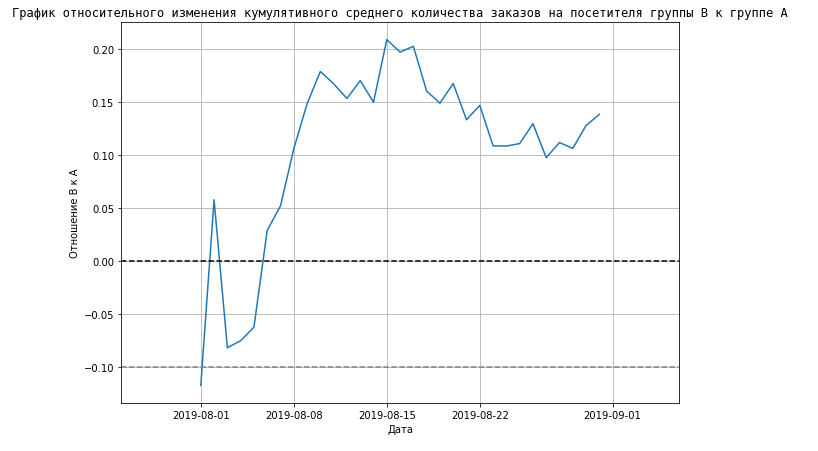

- График различия среднего чека говорит о том, что был резкий положительный рост среднего чека в группе B, но после было заметное падение. Также после падения заметно что график начал стабилизироваться

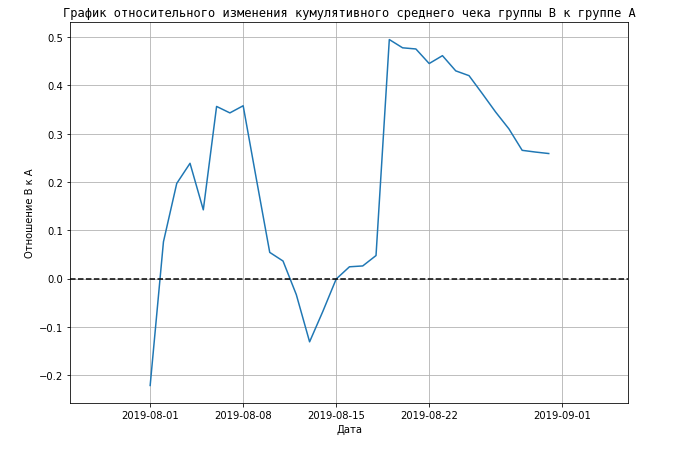

Исходя из обнаруженных фактов, можно сделать вывод о том, что тест следует продолжить. Есть вероятность, что сегмент B все таки лучше сегмента A, стоит еще понаблюдать, как со временем будет меняться отношение кумулятивного значения среднего чека группы B к группе A, стане ли оно равномерным или продолжит падать.